Using device: /CPU:0
Uniaxial data: 4 points for training (small strains), 5 for testing (large strains).
Biaxial data: 3 points for training (small strains), 3 for testing (large strains).
Training starts on small strain data...
E[100/4000], L1:4.346e+02, L2:2.046e+02, Tot:6.392e+02, LR:5.00e-04
E[200/4000], L1:1.984e+02, L2:2.561e+02, Tot:4.545e+02, LR:5.00e-04
E[300/4000], L1:7.760e+01, L2:2.999e+02, Tot:3.775e+02, LR:5.00e-04
E[400/4000], L1:3.410e+01, L2:3.223e+02, Tot:3.564e+02, LR:5.00e-04
E[500/4000], L1:3.245e+01, L2:3.140e+02, Tot:3.465e+02, LR:5.00e-04
E[600/4000], L1:3.161e+01, L2:3.066e+02, Tot:3.383e+02, LR:5.00e-04
E[700/4000], L1:3.118e+01, L2:3.002e+02, Tot:3.313e+02, LR:5.00e-04
E[800/4000], L1:3.097e+01, L2:2.944e+02, Tot:3.254e+02, LR:5.00e-04
E[900/4000], L1:3.089e+01, L2:2.893e+02, Tot:3.202e+02, LR:5.00e-04
E[1000/4000], L1:3.084e+01, L2:2.847e+02, Tot:3.156e+02, LR:4.80e-04
E[1100/4000], L1:3.081e+01, L2:2.808e+02, Tot:3.116e+02, LR:4.80e-04
E[1200/4000], L1:3.0

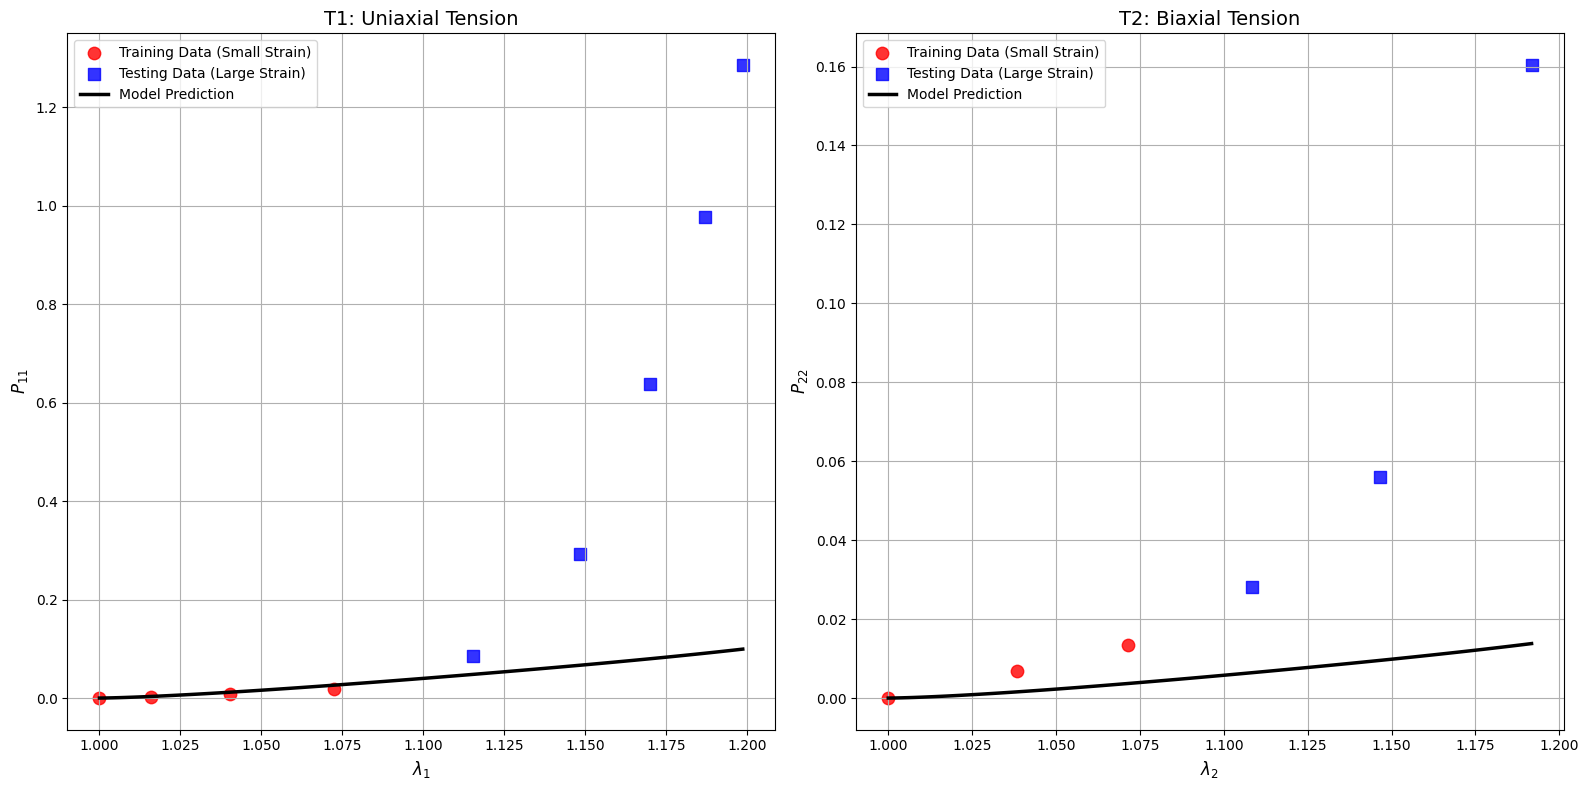


          Final Learned Model Parameters (Raw Log Form)
raw_log_k1          : -0.98724117
raw_log_k2          : -0.74296420
raw_log_k3          : -0.71837684
raw_log_k4          : -0.53575886
raw_log_k5          : -0.17727668
raw_log_k6          : -0.30213252
raw_log_k7          : -0.70304443
raw_log_k8          : -0.10334518
raw_log_k9          : -0.72052837
raw_log_k10         : -1.07775738
raw_log_k11         : -1.59586922
raw_log_k12         : -1.01123071
raw_log_k13         : -0.90877585
raw_log_k14         : -0.53611638
raw_log_k15         : -1.76039280
raw_log_k16         : -1.01018333
raw_log_i1          : -1.23043031
raw_log_i2          : -1.46640073
raw_log_i3          : 0.50193317
raw_log_i4          : -1.29861871
raw_log_i5          : 0.21300691
raw_log_i6          : 0.26480990
raw_log_i7          : 0.54422352
raw_log_i8          : -1.44961346
raw_log_a1          : -3.16215076
raw_log_a2          : -2.81708899
raw_log_a3          : -2.73320536
raw_log_a4          : -2.5703

In [2]:
# !pip install tensorflow
import tensorflow as tf
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

tf.keras.backend.set_floatx('float64')
DEVICE = "/GPU:0" if tf.config.list_physical_devices('GPU') else "/CPU:0"
print(f"Using device: {DEVICE}")

ARG_CLIP_MIN = tf.constant(-10.0, dtype=tf.float64)
ARG_CLIP_MAX = tf.constant(10.0, dtype=tf.float64)

class StrainEnergyANN_Layered_TF(tf.keras.Model):
    def __init__(self):
        super().__init__(name="StrainEnergyModel")
        # k & i params (exponents) - All parameters are now trainable
        self.raw_log_k1=self.add_weight(name="raw_log_k1",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k2=self.add_weight(name="raw_log_k2",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k3=self.add_weight(name="raw_log_k3",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k4=self.add_weight(name="raw_log_k4",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k5=self.add_weight(name="raw_log_k5",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k6=self.add_weight(name="raw_log_k6",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k7=self.add_weight(name="raw_log_k7",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k8=self.add_weight(name="raw_log_k8",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k9=self.add_weight(name="raw_log_k9",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k10=self.add_weight(name="raw_log_k10",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k11=self.add_weight(name="raw_log_k11",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k12=self.add_weight(name="raw_log_k12",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k13=self.add_weight(name="raw_log_k13",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k14=self.add_weight(name="raw_log_k14",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k15=self.add_weight(name="raw_log_k15",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k16=self.add_weight(name="raw_log_k16",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i1=self.add_weight(name="raw_log_i1",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i2=self.add_weight(name="raw_log_i2",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i3=self.add_weight(name="raw_log_i3",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i4=self.add_weight(name="raw_log_i4",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i5=self.add_weight(name="raw_log_i5",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i6=self.add_weight(name="raw_log_i6",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i7=self.add_weight(name="raw_log_i7",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i8=self.add_weight(name="raw_log_i8",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        # Coefficients
        self.raw_log_a1=self.add_weight(name="raw_log_a1",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a2=self.add_weight(name="raw_log_a2",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a3=self.add_weight(name="raw_log_a3",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a4=self.add_weight(name="raw_log_a4",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a5=self.add_weight(name="raw_log_a5",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a6=self.add_weight(name="raw_log_a6",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a7=self.add_weight(name="raw_log_a7",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a8=self.add_weight(name="raw_log_a8",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_b2=self.add_weight(name="raw_log_b2",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.01)),trainable=True)
        self.raw_log_b3=self.add_weight(name="raw_log_b3",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_b4=self.add_weight(name="raw_log_b4",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_b5=self.add_weight(name="raw_log_b5",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_b6=self.add_weight(name="raw_log_b6",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_b7=self.add_weight(name="raw_log_b7",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_b8=self.add_weight(name="raw_log_b8",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a3_prime=self.add_weight(name="raw_log_a3_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_a4_prime=self.add_weight(name="raw_log_a4_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_a5_prime=self.add_weight(name="raw_log_a5_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_a6_prime=self.add_weight(name="raw_log_a6_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_a7_prime=self.add_weight(name="raw_log_a7_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_a8_prime=self.add_weight(name="raw_log_a8_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_b3_prime=self.add_weight(name="raw_log_b3_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_b4_prime=self.add_weight(name="raw_log_b4_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_b5_prime=self.add_weight(name="raw_log_b5_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_b6_prime=self.add_weight(name="raw_log_b6_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_b7_prime=self.add_weight(name="raw_log_b7_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_b8_prime=self.add_weight(name="raw_log_b8_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.three=tf.constant(3.0,dtype=tf.float64); self.one=tf.constant(1.0,dtype=tf.float64); self.pow_base_epsilon=tf.constant(1e-8,dtype=tf.float64)
    def _term_power_law(self, I, k, i, c, ref_val): return c * tf.pow(tf.maximum(tf.pow(I, k) - tf.pow(ref_val, k), 0.0) + self.pow_base_epsilon, i)
    def _term_exponential(self, I, k, i, ic, oc, ref_val): return oc * (tf.exp(tf.clip_by_value(ic * tf.pow(tf.maximum(tf.pow(I, k) - tf.pow(ref_val, k), 0.0) + self.pow_base_epsilon, i), ARG_CLIP_MIN, ARG_CLIP_MAX)) - 1.0)
    def _term_cosh_minus_one_with_i(self, I, k, i, ic, oc, ref_val): return oc * (tf.cosh(tf.clip_by_value(ic * tf.pow(tf.maximum(tf.pow(I, k) - tf.pow(ref_val, k), 0.0) + self.pow_base_epsilon, i), ARG_CLIP_MIN, ARG_CLIP_MAX)) - 1.0)
    def _term_sinh_with_i(self, I, k, i, ic, oc, ref_val): return oc * tf.sinh(tf.clip_by_value(ic * tf.pow(tf.maximum(tf.pow(I, k) - tf.pow(ref_val, k), 0.0) + self.pow_base_epsilon, i), ARG_CLIP_MIN, ARG_CLIP_MAX))
    def _term_identity_scaled(self, I, k, c, ref_val): return c * (tf.pow(I, k) - tf.pow(ref_val, k))
    def _term_exponential_no_i(self, I, k, ic, oc, ref_val): return oc * (tf.exp(tf.clip_by_value(ic * (tf.pow(I, k) - tf.pow(ref_val, k)), ARG_CLIP_MIN, ARG_CLIP_MAX)) - 1.0)
    def _term_cosh_minus_one(self, I, k, ic, oc, ref_val): return oc * (tf.cosh(tf.clip_by_value(ic * (tf.pow(I, k) - tf.pow(ref_val, k)), ARG_CLIP_MIN, ARG_CLIP_MAX)) - 1.0)
    def _term_sinh(self, I, k, ic, oc, ref_val): return oc * tf.sinh(tf.clip_by_value(ic * (tf.pow(I, k) - tf.pow(ref_val, k)), ARG_CLIP_MIN, ARG_CLIP_MAX))
    def call(self, I1, I2, I4, I6):
        k1=1.0+tf.exp(self.raw_log_k1);k2=1.5+tf.exp(self.raw_log_k2);k3=1.0+tf.exp(self.raw_log_k3);k4=1.5+tf.exp(self.raw_log_k4);k5=1.0+tf.exp(self.raw_log_k5);k6=1.5+tf.exp(self.raw_log_k6);k7=1.0+tf.exp(self.raw_log_k7);k8=1.5+tf.exp(self.raw_log_k8);k9=1.0+tf.exp(self.raw_log_k9);k10=1.5+tf.exp(self.raw_log_k10);k11=1.0+tf.exp(self.raw_log_k11);k12=1.5+tf.exp(self.raw_log_k12);k13=1.0+tf.exp(self.raw_log_k13);k14=1.5+tf.exp(self.raw_log_k14);k15=1.0+tf.exp(self.raw_log_k15);k16=1.5+tf.exp(self.raw_log_k16)
        i1=1.0+tf.exp(self.raw_log_i1);i2=1.0+tf.exp(self.raw_log_i2);i3=1.0+tf.exp(self.raw_log_i3);i4=1.0+tf.exp(self.raw_log_i4);i5=1.0+tf.exp(self.raw_log_i5);i6=1.0+tf.exp(self.raw_log_i6);i7=1.0+tf.exp(self.raw_log_i7);i8=1.0+tf.exp(self.raw_log_i8)
        a1=tf.exp(self.raw_log_a1);a2=tf.exp(self.raw_log_a2);a3=tf.exp(self.raw_log_a3);a4=tf.exp(self.raw_log_a4);a5=tf.exp(self.raw_log_a5);a6=tf.exp(self.raw_log_a6);a7=tf.exp(self.raw_log_a7);a8=tf.exp(self.raw_log_a8)
        a3_prime=tf.exp(self.raw_log_a3_prime);a4_prime=tf.exp(self.raw_log_a4_prime);a5_prime=tf.exp(self.raw_log_a5_prime);a6_prime=tf.exp(self.raw_log_a6_prime);a7_prime=tf.exp(self.raw_log_a7_prime);a8_prime=tf.exp(self.raw_log_a8_prime)

        b2=tf.exp(self.raw_log_b2);b3=tf.exp(self.raw_log_b3);b4=tf.exp(self.raw_log_b4);b5=tf.exp(self.raw_log_b5);b6=tf.exp(self.raw_log_b6);b7=tf.exp(self.raw_log_b7);b8=tf.exp(self.raw_log_b8)
        b3_prime=tf.exp(self.raw_log_b3_prime);b4_prime=tf.exp(self.raw_log_b4_prime);b5_prime=tf.exp(self.raw_log_b5_prime);b6_prime=tf.exp(self.raw_log_b6_prime);b7_prime=tf.exp(self.raw_log_b7_prime);b8_prime=tf.exp(self.raw_log_b8_prime)

        lhs_constraint_terms = b3*b3_prime*k11 + b7*b7_prime*k15
        rhs_constraint_terms = b2*k10 + b4*b4_prime*k12 + b8*b8_prime*k16

        b1_numerator = rhs_constraint_terms - lhs_constraint_terms
        b1 = tf.maximum(b1_numerator / k9, 1e-9)

        W = tf.zeros_like(I1,dtype=tf.float64)
        W += self._term_power_law(I1,k1,i1,a1,self.three); W += self._term_power_law(I2,k2,i2,a2,self.three)
        W += self._term_exponential(I1,k3,i3,a3_prime,a3,self.three); W += self._term_exponential(I2,k4,i4,a4_prime,a4,self.three)
        W += self._term_cosh_minus_one_with_i(I1,k5,i5,a5_prime,a5,self.three); W += self._term_cosh_minus_one_with_i(I2,k6,i6,a6_prime,a6,self.three)
        W += self._term_sinh_with_i(I1,k7,i7,a7_prime,a7,self.three); W += self._term_sinh_with_i(I2,k8,i8,a8_prime,a8,self.three)
        W += self._term_identity_scaled(I4,k9,b1,self.one); W += self._term_identity_scaled(I6,k10,b2,self.one)
        W += self._term_exponential_no_i(I4,k11,b3_prime,b3,self.one); W += self._term_exponential_no_i(I6,k12,b4_prime,b4,self.one)
        W += self._term_cosh_minus_one(I4,k13,b5_prime,b5,self.one); W += self._term_cosh_minus_one(I6,k14,b6_prime,b6,self.one)
        W += self._term_sinh(I4,k15,b7_prime,b7,self.one); W += self._term_sinh(I6,k16,b8_prime,b8,self.one)
        return W

@tf.function
def get_invariants_tf(lambda1,lambda2,lambda3):
    min_lambda_val=tf.constant(1e-4,dtype=tf.float64); lambda1=tf.maximum(lambda1,min_lambda_val); lambda2=tf.maximum(lambda2,min_lambda_val); lambda3=tf.maximum(lambda3,min_lambda_val); l1s=tf.pow(lambda1,2.0); l2s=tf.pow(lambda2,2.0); l3s=tf.pow(lambda3,2.0)
    I1=l1s+l2s+l3s; I2=tf.pow(lambda1*lambda2,2.0)+tf.pow(lambda2*lambda3,2.0)+tf.pow(lambda3*lambda1,2.0); I4=l1s; I6=tf.pow(lambda1,-2.0)
    return I1,I2,I4,I6
@tf.function
def get_W_and_gradients_tf(l1t,l2t,l3t,model):
    with tf.GradientTape(watch_accessed_variables=False) as tape:
        tape.watch([l1t, l2t, l3t]); I1, I2, I4, I6 = get_invariants_tf(l1t, l2t, l3t); W_val = model(I1, I2, I4, I6)
    grads = tape.gradient(W_val, [l1t, l2t, l3t]); dWdl1 = grads[0] if grads[0] is not None else tf.zeros_like(l1t); dWdl2 = grads[1] if grads[1] is not None else tf.zeros_like(l2t); dWdl3 = grads[2] if grads[2] is not None else tf.zeros_like(l3t)
    return W_val, dWdl1, dWdl2, dWdl3

@tf.function
def calculate_P11_task1_tf(l1vst, model):
    is_one_mask = tf.abs(l1vst - 1.0) < 1e-9
    l1t = tf.maximum(l1vst, tf.constant(1e-4, dtype=tf.float64))
    l2t = tf.pow(l1t, -0.5)
    l3t = tf.pow(l1t, -0.5)
    _, dWdl1, _, dWdl3 = get_W_and_gradients_tf(l1t, l2t, l3t, model)
    Ph = l3t * dWdl3
    safe_l1t = tf.maximum(l1t, tf.constant(1e-6, dtype=tf.float64))
    p11_calculated = (dWdl1 - Ph / safe_l1t) / 7.5
    return tf.where(is_one_mask, tf.zeros_like(l1vst), p11_calculated)


@tf.function
def sigma11_for_root_tf(lambda1_trial_t, lambda2_fixed_t_tensor, model):
    lambda1_trial_t_stable = tf.maximum(lambda1_trial_t, tf.constant(1e-4, dtype=tf.float64)); lambda2_fixed_t_stable = tf.maximum(lambda2_fixed_t_tensor, tf.constant(1e-4, dtype=tf.float64))
    safe_denom_prod = tf.maximum(lambda1_trial_t_stable * lambda2_fixed_t_stable, tf.constant(1e-6, dtype=tf.float64)); lambda3_trial_t = (1.0 / safe_denom_prod)
    _, dW_dlambda1, _, dW_dlambda3 = get_W_and_gradients_tf(lambda1_trial_t_stable, lambda2_fixed_t_stable, lambda3_trial_t, model); P_hydro = lambda3_trial_t * dW_dlambda3
    safe_lambda1_trial_t_stable = tf.maximum(lambda1_trial_t_stable, tf.constant(1e-6, dtype=tf.float64)); return (dW_dlambda1 - P_hydro / safe_lambda1_trial_t_stable)
@tf.function
def find_lambda1_newton_tf(lambda2_val_scalar_tensor, model, initial_lambda1_guess=1.0, iterations=tf.constant(10, dtype=tf.int32), tol=1e-7):
    min_lambda_val_newton=tf.constant(0.2,dtype=tf.float64); max_lambda_val_newton=tf.constant(3.0,dtype=tf.float64); max_step_lambda=tf.constant(0.1,dtype=tf.float64)
    loop_vars = [tf.constant(0, dtype=tf.int32), initial_lambda1_guess, tf.constant(False, dtype=tf.bool)]
    def cond(i, _, converged): return tf.logical_and(i < iterations, tf.logical_not(converged))
    def body(i, current_lambda, _):
        with tf.GradientTape(watch_accessed_variables=False) as tape:
            tape.watch(current_lambda); sigma11 = sigma11_for_root_tf(current_lambda, lambda2_val_scalar_tensor, model)
        grad = tape.gradient(sigma11, current_lambda); newly_converged = tf.abs(sigma11) < tol
        problem = grad is None or tf.math.is_nan(grad) or tf.math.is_inf(grad)
        def update_lambda():
            delta = sigma11 / (grad + tf.constant(1e-8, dtype=tf.float64) * tf.sign(grad)); problem_delta = tf.math.is_nan(delta) or tf.math.is_inf(delta)
            safe_delta = tf.cond(problem_delta, lambda: tf.constant(0.0, dtype=tf.float64), lambda: delta); clipped_delta = tf.clip_by_value(safe_delta, -max_step_lambda, max_step_lambda)
            return tf.clip_by_value(current_lambda - clipped_delta, min_lambda_val_newton, max_lambda_val_newton)
        next_lambda = tf.cond(problem, lambda: current_lambda, update_lambda); return [i + 1, next_lambda, tf.logical_or(newly_converged, problem)]
    _, final_lambda, _ = tf.while_loop(cond, body, loop_vars); return final_lambda

@tf.function
def calculate_P22_task2_tf(lambda2_val_scalar_tensor, model):
    def compute_stress():
        lambda2_stable = tf.maximum(lambda2_val_scalar_tensor, tf.constant(1e-4, dtype=tf.float64))
        initial_lambda1_guess = 1.0 / tf.sqrt(lambda2_stable)
        lambda1_root_t = tf.cond(
            tf.abs(lambda2_stable - 1.0) < 1e-9,
            lambda: tf.constant(1.0, dtype=tf.float64),
            lambda: find_lambda1_newton_tf(lambda2_stable, model, initial_lambda1_guess)
        )
        lambda1_root_t_stable = tf.maximum(lambda1_root_t, tf.constant(1e-4, dtype=tf.float64))
        safe_denom = tf.maximum(lambda1_root_t_stable * lambda2_stable, tf.constant(1e-6, dtype=tf.float64))
        lambda3_calc_t = (1.0 / safe_denom)
        _, _, dWdl2, dWdl3 = get_W_and_gradients_tf(lambda1_root_t_stable, lambda2_stable, lambda3_calc_t, model)
        Ph = lambda3_calc_t * dWdl3
        safe_lambda2_calc_t = tf.maximum(lambda2_stable, tf.constant(1e-6, dtype=tf.float64))
        return (dWdl2 - Ph / safe_lambda2_calc_t) / 50

    is_one = tf.abs(lambda2_val_scalar_tensor - 1.0) < 1e-9
    return tf.cond(is_one, lambda: tf.constant(0.0, dtype=tf.float64), compute_stress)

@tf.function
def calculate_P22_task2_tf_batch(lambda2_batch, model):
    return tf.scan(lambda _, l2: calculate_P22_task2_tf(l2, model), lambda2_batch, initializer=tf.constant(0.0, dtype=tf.float64))

# --- Data Loading and Splitting ---
exp_data_raw_uniaxial_cnf=np.array([[1.1986196319018403,1.285990338164251],[1.18680981595092,0.9768115942028984],[1.1699386503067484,0.638647342995169],[1.1483128834355827,0.29275362318840586],[1.1153374233128834,0.08502415458937207],[1.0725460122699388,0.018357487922705418],[1.040184049079755,0.00869565217391316],[1.0157975460122703,0.0019323671497585848],[1.0,0.0]])
lambda1_data_task1_np=exp_data_raw_uniaxial_cnf[:,0]; P11_data_task1_np=exp_data_raw_uniaxial_cnf[:,1]
csv_content_cnf="lambda,stress\n1.1917177914110426,0.16038647342995177\n1.1464723926380367,0.056038647342995296\n1.108435582822086,0.028019323671497676\n1.071472392638037,0.013526570048309317\n1.038343558282209,0.006763285024154686\n1.0,0.0\n"
df_task2=pd.read_csv(StringIO(csv_content_cnf)); lambda2_data_task2_np=df_task2['lambda'].values; P22_data_task2_np=df_task2['stress'].values

# --- MODIFICATION: Split Data into Training (small strain) and Testing (large strain) ---
uniaxial_split_stretch = 1.1
biaxial_split_stretch = 1.1

# Uniaxial split
uniaxial_train_mask = lambda1_data_task1_np <= uniaxial_split_stretch
uniaxial_test_mask = lambda1_data_task1_np > uniaxial_split_stretch
lambda1_data_task1_train_np = lambda1_data_task1_np[uniaxial_train_mask]
P11_data_task1_train_np = P11_data_task1_np[uniaxial_train_mask]
lambda1_data_task1_test_np = lambda1_data_task1_np[uniaxial_test_mask]
P11_data_task1_test_np = P11_data_task1_np[uniaxial_test_mask]

# Biaxial split
biaxial_train_mask = lambda2_data_task2_np <= biaxial_split_stretch
biaxial_test_mask = lambda2_data_task2_np > biaxial_split_stretch
lambda2_data_task2_train_np = lambda2_data_task2_np[biaxial_train_mask]
P22_data_task2_train_np = P22_data_task2_np[biaxial_train_mask]
lambda2_data_task2_test_np = lambda2_data_task2_np[biaxial_test_mask]
P22_data_task2_test_np = P22_data_task2_np[biaxial_test_mask]

print(f"Uniaxial data: {len(lambda1_data_task1_train_np)} points for training (small strains), {len(lambda1_data_task1_test_np)} for testing (large strains).")
print(f"Biaxial data: {len(lambda2_data_task2_train_np)} points for training (small strains), {len(lambda2_data_task2_test_np)} for testing (large strains).")

# --- Normalization ---
stress_scale = max(np.max(P11_data_task1_np), np.max(P22_data_task2_np))
P11_data_task1_norm_train_np = P11_data_task1_train_np / stress_scale
P22_data_task2_norm_train_np = P22_data_task2_train_np / stress_scale
P11_data_task1_norm_test_np = P11_data_task1_test_np / stress_scale
P22_data_task2_norm_test_np = P22_data_task2_test_np / stress_scale
stress_scale_tf = tf.constant(stress_scale, dtype=tf.float64)

# Create Tensors for TRAINING
lambda1_data_task1_train_tf = tf.constant(lambda1_data_task1_train_np, dtype=tf.float64)
P11_data_task1_norm_train_tf = tf.constant(P11_data_task1_norm_train_np, dtype=tf.float64)
lambda2_data_task2_train_tf = tf.constant(lambda2_data_task2_train_np, dtype=tf.float64)
P22_data_task2_norm_train_tf = tf.constant(P22_data_task2_norm_train_np, dtype=tf.float64)

# Create Tensors for TESTING
lambda1_data_task1_test_tf = tf.constant(lambda1_data_task1_test_np, dtype=tf.float64)
P11_data_task1_norm_test_tf = tf.constant(P11_data_task1_norm_test_np, dtype=tf.float64)
lambda2_data_task2_test_tf = tf.constant(lambda2_data_task2_test_np, dtype=tf.float64)
P22_data_task2_norm_test_tf = tf.constant(P22_data_task2_norm_test_np, dtype=tf.float64)

# --- Model, Optimizer, and Final Training Setup ---
model_tf_layered = StrainEnergyANN_Layered_TF()
L2_REG_STRENGTH = tf.constant(1e-12, dtype=tf.float64)
ZERO_STRAIN_PENALTY = tf.constant(1e6, dtype=tf.float64)
POSITIVITY_PENALTY_STRENGTH = tf.constant(5e4, dtype=tf.float64)
initial_learning_rate = 5e-4
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps=1000, decay_rate=0.96, staircase=True)
optimizer_tf = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


# ==============================================================================
# CORRECTED FUNCTION HERE
# ==============================================================================
@tf.function
def calculate_total_loss(l1_batch, p11_batch_norm, l2_batch, p22_batch_norm, model, scale_factor, l2_reg, pos_penalty_strength, zero_penalty):
    """Calculates the total loss for a given dataset without performing gradient updates."""
    p11_pred = calculate_P11_task1_tf(l1_batch, model)
    # Ensure p22_pred is calculated only if l2_batch is not empty
    if tf.shape(l2_batch)[0] > 0:
        p22_pred = calculate_P22_task2_tf_batch(l2_batch, model)
    else:
        p22_pred = tf.constant([], dtype=tf.float64)


    p11_pred_norm = p11_pred / scale_factor
    p22_pred_norm = p22_pred / scale_factor

    loss1_weight = 2500000.0
    loss2_weight = 10000000.0

    # THE FIX IS HERE: use tf.constant(0.0, dtype=tf.float64) in the else branches
    loss1 = tf.reduce_mean(tf.square(p11_batch_norm - p11_pred_norm)) * loss1_weight if tf.shape(l1_batch)[0] > 0 else tf.constant(0.0, dtype=tf.float64)
    loss2 = tf.reduce_mean(tf.square(p22_batch_norm - p22_pred_norm)) * loss2_weight if tf.shape(l2_batch)[0] > 0 else tf.constant(0.0, dtype=tf.float64)

    p11_at_zero = calculate_P11_task1_tf(tf.constant([1.0], dtype=tf.float64), model)[0]
    p22_at_zero = calculate_P22_task2_tf(tf.constant(1.0, dtype=tf.float64), model)
    zero_strain_loss = tf.square(p11_at_zero) + tf.square(p22_at_zero)

    positivity_loss_1 = tf.reduce_mean(tf.nn.relu(-p11_pred)) if tf.shape(l1_batch)[0] > 0 else tf.constant(0.0, dtype=tf.float64)
    positivity_loss_2 = tf.reduce_mean(tf.nn.relu(-p22_pred)) if tf.shape(l2_batch)[0] > 0 else tf.constant(0.0, dtype=tf.float64)

    l2_loss = tf.add_n([tf.nn.l2_loss(v) for v in model.trainable_variables])

    total_loss = (loss1 + loss2 +
                  l2_reg * l2_loss +
                  pos_penalty_strength * (positivity_loss_1 + positivity_loss_2) +
                  zero_penalty * zero_strain_loss)
    return total_loss, loss1, loss2
# ==============================================================================
# END OF CORRECTION
# ==============================================================================


@tf.function
def train_step_final(l1_batch, p11_batch_norm, l2_batch, p22_batch_norm, model, scale_factor, l2_reg, pos_penalty_strength, zero_penalty):
    with tf.GradientTape() as tape:
        total_loss, loss1, loss2 = calculate_total_loss(l1_batch, p11_batch_norm, l2_batch, p22_batch_norm, model, scale_factor, l2_reg, pos_penalty_strength, zero_penalty)

    t_vars = model.trainable_variables
    grads = tape.gradient(total_loss, t_vars)
    optimizer_tf.apply_gradients(zip([tf.clip_by_norm(g, 1.0) if g is not None else tf.zeros_like(v) for g, v in zip(grads, t_vars)], t_vars))
    return loss1, loss2, total_loss

# --- Training Loop ---
epochs=4000
dI1=tf.constant([3.0],dtype=tf.float64); dI2=tf.constant([3.0],dtype=tf.float64); dI4=tf.constant([1.0],dtype=tf.float64); dI6=tf.constant([1.e-6],dtype=tf.float64)
_=model_tf_layered(dI1,dI2,dI4,dI6)

print("Training starts on small strain data...");
for e in range(epochs):
    # --- MODIFICATION: Use only the TRAINING data in the training step ---
    l1,l2,tl=train_step_final(lambda1_data_task1_train_tf, P11_data_task1_norm_train_tf, lambda2_data_task2_train_tf, P22_data_task2_norm_train_tf,
                              model_tf_layered, stress_scale_tf, L2_REG_STRENGTH, POSITIVITY_PENALTY_STRENGTH, ZERO_STRAIN_PENALTY)
    if (e+1)%100==0:
        current_lr = lr_schedule(optimizer_tf.iterations).numpy()
        print(f"E[{e+1}/{epochs}], L1:{l1.numpy():.3e}, L2:{l2.numpy():.3e}, Tot:{tl.numpy():.3e}, LR:{current_lr:.2e}")

# --- MODIFICATION: Final Evaluation on Training and Testing Sets ---
final_train_loss, _, _ = calculate_total_loss(lambda1_data_task1_train_tf, P11_data_task1_norm_train_tf, lambda2_data_task2_train_tf, P22_data_task2_norm_train_tf,
                                           model_tf_layered, stress_scale_tf, L2_REG_STRENGTH, POSITIVITY_PENALTY_STRENGTH, ZERO_STRAIN_PENALTY)
final_test_loss, _, _ = calculate_total_loss(lambda1_data_task1_test_tf, P11_data_task1_norm_test_tf, lambda2_data_task2_test_tf, P22_data_task2_norm_test_tf,
                                         model_tf_layered, stress_scale_tf, L2_REG_STRENGTH, POSITIVITY_PENALTY_STRENGTH, ZERO_STRAIN_PENALTY)

print("\n" + "="*50)
print(f"Final Loss on Training Set (Small Strains): {final_train_loss.numpy():.3e}")
print(f"Final Loss on Testing Set (Large Strains):  {final_test_loss.numpy():.3e}")
print("="*50)


# --- MODIFICATION: Updated Plotting ---
l1_plot = np.linspace(lambda1_data_task1_np.min(), lambda1_data_task1_np.max(), 100)
p11_plot = calculate_P11_task1_tf(tf.constant(l1_plot, dtype=tf.float64), model_tf_layered).numpy()
l2_plot = np.linspace(lambda2_data_task2_np.min(), lambda2_data_task2_np.max(), 100)
p22_plot = calculate_P22_task2_tf_batch(tf.constant(l2_plot, dtype=tf.float64), model_tf_layered).numpy()

plt.figure(figsize=(16, 8))

# Plot for Task 1
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(lambda1_data_task1_train_np, P11_data_task1_train_np, c='r', label='Training Data (Small Strain)', s=80, alpha=0.8)
ax1.scatter(lambda1_data_task1_test_np, P11_data_task1_test_np, c='b', marker='s', label='Testing Data (Large Strain)', s=80, alpha=0.8)
ax1.plot(l1_plot, p11_plot, c='k', label='Model Prediction', linewidth=2.5)
ax1.legend()
ax1.grid(True)
ax1.set_xlabel(r"$\lambda_1$", fontsize=12)
ax1.set_ylabel("$P_{11}$", fontsize=12)
ax1.set_title("T1: Uniaxial Tension", fontsize=14)

# Plot for Task 2
ax2 = plt.subplot(1, 2, 2)
ax2.scatter(lambda2_data_task2_train_np, P22_data_task2_train_np, c='r', label='Training Data (Small Strain)', s=80, alpha=0.8)
ax2.scatter(lambda2_data_task2_test_np, P22_data_task2_test_np, c='b', marker='s', label='Testing Data (Large Strain)', s=80, alpha=0.8)
ax2.plot(l2_plot, p22_plot, c='k', label='Model Prediction', linewidth=2.5)
ax2.legend()
ax2.grid(True)
ax2.set_xlabel(r"$\lambda_2$", fontsize=12)
ax2.set_ylabel("$P_{22}$", fontsize=12)
ax2.set_title("T2: Biaxial Tension", fontsize=14)

plt.tight_layout()
plt.show()

# Print Final Model Parameters (Code from your request is unchanged)
print("\n" + "="*50)
print("          Final Learned Model Parameters (Raw Log Form)")
print("="*50)
for v in model_tf_layered.trainable_variables:
    print(f"{v.name:20s}: {v.numpy():.8f}")
print("\n" + "="*50)
print("       Transformed Model Parameters (as used in call)")
print("="*50)
print("\n--- k parameters (exponents) ---")
print(f"{'k1:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_k1).numpy():.8f}")
print(f"{'k2:':<20s} {1.5+tf.exp(model_tf_layered.raw_log_k2).numpy():.8f}")
print(f"{'k3:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_k3).numpy():.8f}")
print(f"{'k4:':<20s} {1.5+tf.exp(model_tf_layered.raw_log_k4).numpy():.8f}")
print(f"{'k5:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_k5).numpy():.8f}")
print(f"{'k6:':<20s} {1.5+tf.exp(model_tf_layered.raw_log_k6).numpy():.8f}")
print(f"{'k7:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_k7).numpy():.8f}")
print(f"{'k8:':<20s} {1.5+tf.exp(model_tf_layered.raw_log_k8).numpy():.8f}")
print(f"{'k9:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_k9).numpy():.8f}")
print(f"{'k10:':<20s} {1.5+tf.exp(model_tf_layered.raw_log_k10).numpy():.8f}")
print(f"{'k11:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_k11).numpy():.8f}")
print(f"{'k12:':<20s} {1.5+tf.exp(model_tf_layered.raw_log_k12).numpy():.8f}")
print(f"{'k13:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_k13).numpy():.8f}")
print(f"{'k14:':<20s} {1.5+tf.exp(model_tf_layered.raw_log_k14).numpy():.8f}")
print(f"{'k15:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_k15).numpy():.8f}")
print(f"{'k16:':<20s} {1.5+tf.exp(model_tf_layered.raw_log_k16).numpy():.8f}")
print("\n--- i parameters (exponents) ---")
print(f"{'i1:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_i1).numpy():.8f}")
print(f"{'i2:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_i2).numpy():.8f}")
print(f"{'i3:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_i3).numpy():.8f}")
print(f"{'i4:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_i4).numpy():.8f}")
print(f"{'i5:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_i5).numpy():.8f}")
print(f"{'i6:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_i6).numpy():.8f}")
print(f"{'i7:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_i7).numpy():.8f}")
print(f"{'i8:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_i8).numpy():.8f}")
print("\n--- a parameters (coefficients) ---")
print(f"{'a1:':<20s} {tf.exp(model_tf_layered.raw_log_a1).numpy():.8f}")
print(f"{'a2:':<20s} {tf.exp(model_tf_layered.raw_log_a2).numpy():.8f}")
print(f"{'a3:':<20s} {tf.exp(model_tf_layered.raw_log_a3).numpy():.8f}")
print(f"{'a4:':<20s} {tf.exp(model_tf_layered.raw_log_a4).numpy():.8f}")
print(f"{'a5:':<20s} {tf.exp(model_tf_layered.raw_log_a5).numpy():.8f}")
print(f"{'a6:':<20s} {tf.exp(model_tf_layered.raw_log_a6).numpy():.8f}")
print(f"{'a7:':<20s} {tf.exp(model_tf_layered.raw_log_a7).numpy():.8f}")
print(f"{'a8:':<20s} {tf.exp(model_tf_layered.raw_log_a8).numpy():.8f}")
print("\n--- a_prime parameters (inner coefficients) ---")
print(f"{'a3_prime:':<20s} {tf.exp(model_tf_layered.raw_log_a3_prime).numpy():.8f}")
print(f"{'a4_prime:':<20s} {tf.exp(model_tf_layered.raw_log_a4_prime).numpy():.8f}")
print(f"{'a5_prime:':<20s} {tf.exp(model_tf_layered.raw_log_a5_prime).numpy():.8f}")
print(f"{'a6_prime:':<20s} {tf.exp(model_tf_layered.raw_log_a6_prime).numpy():.8f}")
print(f"{'a7_prime:':<20s} {tf.exp(model_tf_layered.raw_log_a7_prime).numpy():.8f}")
print(f"{'a8_prime:':<20s} {tf.exp(model_tf_layered.raw_log_a8_prime).numpy():.8f}")
print("\n--- b parameters (coefficients) ---")
k9=1.0+tf.exp(model_tf_layered.raw_log_k9); k10=1.5+tf.exp(model_tf_layered.raw_log_k10)
k11=1.0+tf.exp(model_tf_layered.raw_log_k11); k12=1.5+tf.exp(model_tf_layered.raw_log_k12)
k15=1.0+tf.exp(model_tf_layered.raw_log_k15); k16=1.5+tf.exp(model_tf_layered.raw_log_k16)
b2=tf.exp(model_tf_layered.raw_log_b2); b3=tf.exp(model_tf_layered.raw_log_b3)
b4=tf.exp(model_tf_layered.raw_log_b4); b7=tf.exp(model_tf_layered.raw_log_b7)
b8=tf.exp(model_tf_layered.raw_log_b8); b3_prime=tf.exp(model_tf_layered.raw_log_b3_prime)
b4_prime=tf.exp(model_tf_layered.raw_log_b4_prime); b7_prime=tf.exp(model_tf_layered.raw_log_b7_prime)
b8_prime=tf.exp(model_tf_layered.raw_log_b8_prime)
lhs_constraint_terms = b3*b3_prime*k11 + b7*b7_prime*k15
rhs_constraint_terms = b2*k10 + b4*b4_prime*k12 + b8*b8_prime*k16
b1_numerator = rhs_constraint_terms - lhs_constraint_terms
b1 = tf.maximum(b1_numerator / k9, 1e-9)
print(f"{'b1 (calculated):':<20s} {b1.numpy():.8f}")
print(f"{'b2:':<20s} {tf.exp(model_tf_layered.raw_log_b2).numpy():.8f}")
print(f"{'b3:':<20s} {tf.exp(model_tf_layered.raw_log_b3).numpy():.8f}")
print(f"{'b4:':<20s} {tf.exp(model_tf_layered.raw_log_b4).numpy():.8f}")
print(f"{'b5:':<20s} {tf.exp(model_tf_layered.raw_log_b5).numpy():.8f}")
print(f"{'b6:':<20s} {tf.exp(model_tf_layered.raw_log_b6).numpy():.8f}")
print(f"{'b7:':<20s} {tf.exp(model_tf_layered.raw_log_b7).numpy():.8f}")
print(f"{'b8:':<20s} {tf.exp(model_tf_layered.raw_log_b8).numpy():.8f}")
print("\n--- b_prime parameters (inner coefficients) ---")
print(f"{'b3_prime:':<20s} {tf.exp(model_tf_layered.raw_log_b3_prime).numpy():.8f}")
print(f"{'b4_prime:':<20s} {tf.exp(model_tf_layered.raw_log_b4_prime).numpy():.8f}")
print(f"{'b5_prime:':<20s} {tf.exp(model_tf_layered.raw_log_b5_prime).numpy():.8f}")
print(f"{'b6_prime:':<20s} {tf.exp(model_tf_layered.raw_log_b6_prime).numpy():.8f}")
print(f"{'b7_prime:':<20s} {tf.exp(model_tf_layered.raw_log_b7_prime).numpy():.8f}")
print(f"{'b8_prime:':<20s} {tf.exp(model_tf_layered.raw_log_b8_prime).numpy():.8f}")
print("="*50)

Using device: /CPU:0
Uniaxial data: 4 points for training (small strains), 5 for testing (large strains).
Biaxial data: 3 points for training (small strains), 3 for testing (large strains).
Training starts on small strain data...
E[100/4000], L1:4.471e+02, L2:2.017e+02, Tot:6.488e+02, LR:5.00e-04
E[200/4000], L1:2.055e+02, L2:2.533e+02, Tot:4.588e+02, LR:5.00e-04
E[300/4000], L1:8.129e+01, L2:2.974e+02, Tot:3.787e+02, LR:5.00e-04
E[400/4000], L1:3.367e+01, L2:3.226e+02, Tot:3.563e+02, LR:5.00e-04
E[500/4000], L1:3.252e+01, L2:3.137e+02, Tot:3.462e+02, LR:5.00e-04
E[600/4000], L1:3.167e+01, L2:3.063e+02, Tot:3.380e+02, LR:5.00e-04
E[700/4000], L1:3.123e+01, L2:2.998e+02, Tot:3.310e+02, LR:5.00e-04
E[800/4000], L1:3.101e+01, L2:2.941e+02, Tot:3.251e+02, LR:5.00e-04
E[900/4000], L1:3.091e+01, L2:2.889e+02, Tot:3.198e+02, LR:5.00e-04
E[1000/4000], L1:3.085e+01, L2:2.844e+02, Tot:3.152e+02, LR:4.80e-04
E[1100/4000], L1:3.080e+01, L2:2.804e+02, Tot:3.112e+02, LR:4.80e-04
E[1200/4000], L1:3.0

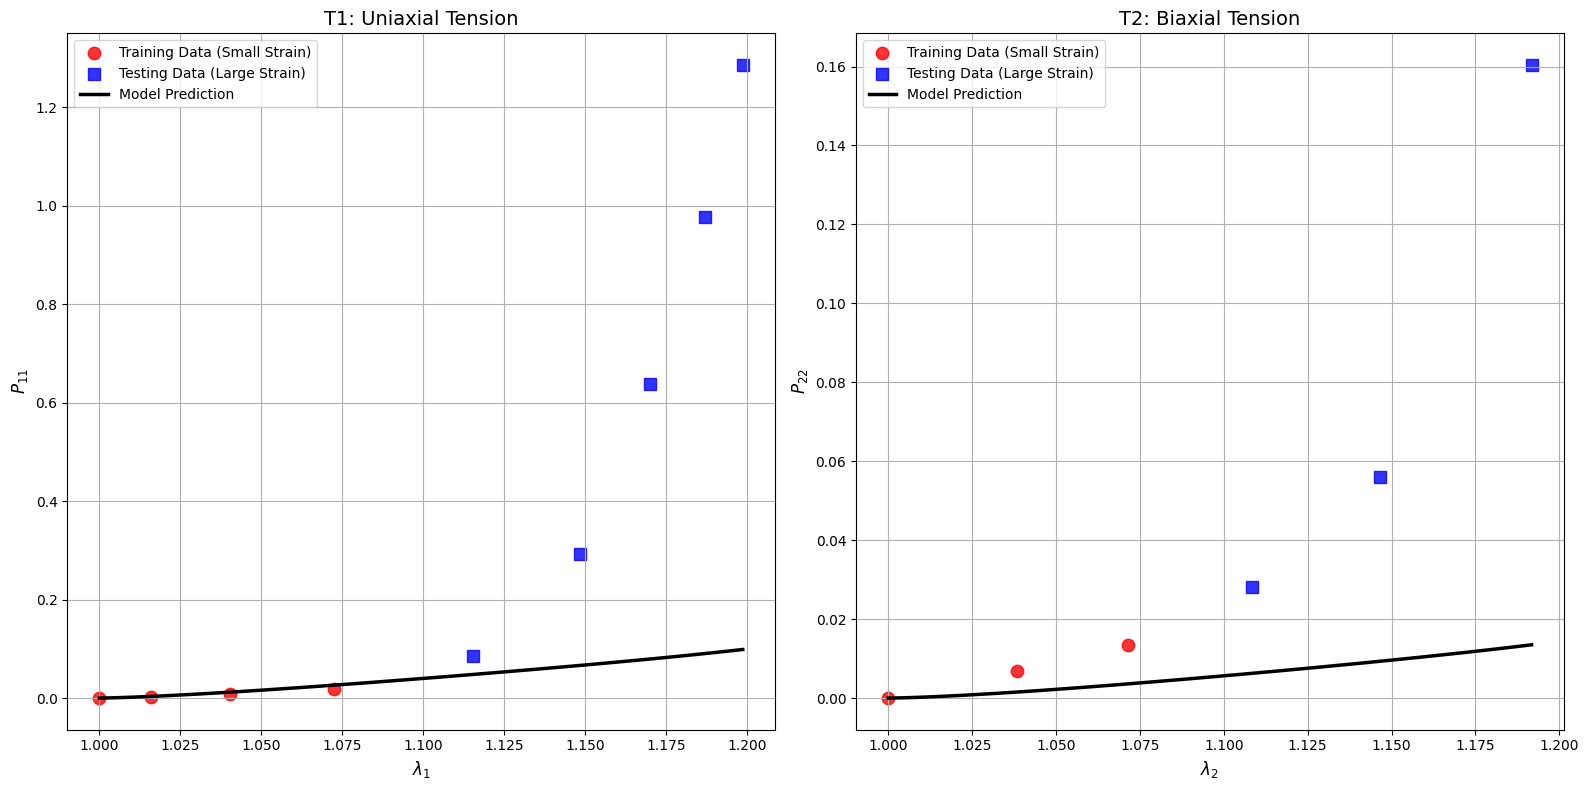


          Final Learned Model Parameters (Raw Log Form)
raw_log_k1          : -0.99779079
raw_log_k2          : -0.67329093
raw_log_k3          : -0.67978900
raw_log_k4          : -0.59327688
raw_log_k5          : -0.18478547
raw_log_k6          : -0.29278590
raw_log_k7          : -0.69408700
raw_log_k8          : -0.19879501
raw_log_k9          : -0.59058481
raw_log_k10         : -0.83117636
raw_log_k11         : -1.61068944
raw_log_k12         : -0.82906536
raw_log_k13         : -0.89657613
raw_log_k14         : -0.55833361
raw_log_k15         : -1.84752376
raw_log_k16         : -0.82762314
raw_log_i1          : -1.16593886
raw_log_i2          : -1.47206795
raw_log_i3          : 0.55791869
raw_log_i4          : -1.21417293
raw_log_i5          : 0.18422755
raw_log_i6          : 0.25824354
raw_log_i7          : 0.52003272
raw_log_i8          : -1.39306825
raw_log_a1          : -3.20103203
raw_log_a2          : -2.72391997
raw_log_a3          : -2.70553805
raw_log_a4          : -2.6775

In [1]:
# !pip install tensorflow
import tensorflow as tf
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

tf.keras.backend.set_floatx('float64')
DEVICE = "/GPU:0" if tf.config.list_physical_devices('GPU') else "/CPU:0"
print(f"Using device: {DEVICE}")

ARG_CLIP_MIN = tf.constant(-10.0, dtype=tf.float64)
ARG_CLIP_MAX = tf.constant(10.0, dtype=tf.float64)

class StrainEnergyANN_Layered_TF(tf.keras.Model):
    def __init__(self):
        super().__init__(name="StrainEnergyModel")
        # k & i params (exponents) - All parameters are now trainable
        self.raw_log_k1=self.add_weight(name="raw_log_k1",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k2=self.add_weight(name="raw_log_k2",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k3=self.add_weight(name="raw_log_k3",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k4=self.add_weight(name="raw_log_k4",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k5=self.add_weight(name="raw_log_k5",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k6=self.add_weight(name="raw_log_k6",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k7=self.add_weight(name="raw_log_k7",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k8=self.add_weight(name="raw_log_k8",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k9=self.add_weight(name="raw_log_k9",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k10=self.add_weight(name="raw_log_k10",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k11=self.add_weight(name="raw_log_k11",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k12=self.add_weight(name="raw_log_k12",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k13=self.add_weight(name="raw_log_k13",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k14=self.add_weight(name="raw_log_k14",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k15=self.add_weight(name="raw_log_k15",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k16=self.add_weight(name="raw_log_k16",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i1=self.add_weight(name="raw_log_i1",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i2=self.add_weight(name="raw_log_i2",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i3=self.add_weight(name="raw_log_i3",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i4=self.add_weight(name="raw_log_i4",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i5=self.add_weight(name="raw_log_i5",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i6=self.add_weight(name="raw_log_i6",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i7=self.add_weight(name="raw_log_i7",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i8=self.add_weight(name="raw_log_i8",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        # Coefficients
        self.raw_log_a1=self.add_weight(name="raw_log_a1",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a2=self.add_weight(name="raw_log_a2",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a3=self.add_weight(name="raw_log_a3",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a4=self.add_weight(name="raw_log_a4",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a5=self.add_weight(name="raw_log_a5",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a6=self.add_weight(name="raw_log_a6",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a7=self.add_weight(name="raw_log_a7",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a8=self.add_weight(name="raw_log_a8",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_b2=self.add_weight(name="raw_log_b2",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.01)),trainable=True)
        self.raw_log_b3=self.add_weight(name="raw_log_b3",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_b4=self.add_weight(name="raw_log_b4",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_b5=self.add_weight(name="raw_log_b5",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_b6=self.add_weight(name="raw_log_b6",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_b7=self.add_weight(name="raw_log_b7",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_b8=self.add_weight(name="raw_log_b8",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a3_prime=self.add_weight(name="raw_log_a3_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_a4_prime=self.add_weight(name="raw_log_a4_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_a5_prime=self.add_weight(name="raw_log_a5_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_a6_prime=self.add_weight(name="raw_log_a6_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_a7_prime=self.add_weight(name="raw_log_a7_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_a8_prime=self.add_weight(name="raw_log_a8_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_b3_prime=self.add_weight(name="raw_log_b3_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_b4_prime=self.add_weight(name="raw_log_b4_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_b5_prime=self.add_weight(name="raw_log_b5_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_b6_prime=self.add_weight(name="raw_log_b6_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_b7_prime=self.add_weight(name="raw_log_b7_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_b8_prime=self.add_weight(name="raw_log_b8_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.three=tf.constant(3.0,dtype=tf.float64); self.one=tf.constant(1.0,dtype=tf.float64); self.pow_base_epsilon=tf.constant(1e-8,dtype=tf.float64)
    def _term_power_law(self, I, k, i, c, ref_val): return c * tf.pow(tf.maximum(tf.pow(I, k) - tf.pow(ref_val, k), 0.0) + self.pow_base_epsilon, i)
    def _term_exponential(self, I, k, i, ic, oc, ref_val): return oc * (tf.exp(tf.clip_by_value(ic * tf.pow(tf.maximum(tf.pow(I, k) - tf.pow(ref_val, k), 0.0) + self.pow_base_epsilon, i), ARG_CLIP_MIN, ARG_CLIP_MAX)) - 1.0)
    def _term_cosh_minus_one_with_i(self, I, k, i, ic, oc, ref_val): return oc * (tf.cosh(tf.clip_by_value(ic * tf.pow(tf.maximum(tf.pow(I, k) - tf.pow(ref_val, k), 0.0) + self.pow_base_epsilon, i), ARG_CLIP_MIN, ARG_CLIP_MAX)) - 1.0)
    def _term_sinh_with_i(self, I, k, i, ic, oc, ref_val): return oc * tf.sinh(tf.clip_by_value(ic * tf.pow(tf.maximum(tf.pow(I, k) - tf.pow(ref_val, k), 0.0) + self.pow_base_epsilon, i), ARG_CLIP_MIN, ARG_CLIP_MAX))
    def _term_identity_scaled(self, I, k, c, ref_val): return c * (tf.pow(I, k) - tf.pow(ref_val, k))
    def _term_exponential_no_i(self, I, k, ic, oc, ref_val): return oc * (tf.exp(tf.clip_by_value(ic * (tf.pow(I, k) - tf.pow(ref_val, k)), ARG_CLIP_MIN, ARG_CLIP_MAX)) - 1.0)
    def _term_cosh_minus_one(self, I, k, ic, oc, ref_val): return oc * (tf.cosh(tf.clip_by_value(ic * (tf.pow(I, k) - tf.pow(ref_val, k)), ARG_CLIP_MIN, ARG_CLIP_MAX)) - 1.0)
    def _term_sinh(self, I, k, ic, oc, ref_val): return oc * tf.sinh(tf.clip_by_value(ic * (tf.pow(I, k) - tf.pow(ref_val, k)), ARG_CLIP_MIN, ARG_CLIP_MAX))
    def call(self, I1, I2, I4, I6):
        k1=1.0+tf.exp(self.raw_log_k1);k2=1.5+tf.exp(self.raw_log_k2);k3=1.0+tf.exp(self.raw_log_k3);k4=1.5+tf.exp(self.raw_log_k4);k5=1.0+tf.exp(self.raw_log_k5);k6=1.5+tf.exp(self.raw_log_k6);k7=1.0+tf.exp(self.raw_log_k7);k8=1.5+tf.exp(self.raw_log_k8);k9=1.0+tf.exp(self.raw_log_k9);k10=1.5+tf.exp(self.raw_log_k10);k11=1.0+tf.exp(self.raw_log_k11);k12=1.5+tf.exp(self.raw_log_k12);k13=1.0+tf.exp(self.raw_log_k13);k14=1.5+tf.exp(self.raw_log_k14);k15=1.0+tf.exp(self.raw_log_k15);k16=1.5+tf.exp(self.raw_log_k16)
        i1=1.0+tf.exp(self.raw_log_i1);i2=1.0+tf.exp(self.raw_log_i2);i3=1.0+tf.exp(self.raw_log_i3);i4=1.0+tf.exp(self.raw_log_i4);i5=1.0+tf.exp(self.raw_log_i5);i6=1.0+tf.exp(self.raw_log_i6);i7=1.0+tf.exp(self.raw_log_i7);i8=1.0+tf.exp(self.raw_log_i8)
        a1=tf.exp(self.raw_log_a1);a2=tf.exp(self.raw_log_a2);a3=tf.exp(self.raw_log_a3);a4=tf.exp(self.raw_log_a4);a5=tf.exp(self.raw_log_a5);a6=tf.exp(self.raw_log_a6);a7=tf.exp(self.raw_log_a7);a8=tf.exp(self.raw_log_a8)
        a3_prime=tf.exp(self.raw_log_a3_prime);a4_prime=tf.exp(self.raw_log_a4_prime);a5_prime=tf.exp(self.raw_log_a5_prime);a6_prime=tf.exp(self.raw_log_a6_prime);a7_prime=tf.exp(self.raw_log_a7_prime);a8_prime=tf.exp(self.raw_log_a8_prime)

        b2=tf.exp(self.raw_log_b2);b3=tf.exp(self.raw_log_b3);b4=tf.exp(self.raw_log_b4);b5=tf.exp(self.raw_log_b5);b6=tf.exp(self.raw_log_b6);b7=tf.exp(self.raw_log_b7);b8=tf.exp(self.raw_log_b8)
        b3_prime=tf.exp(self.raw_log_b3_prime);b4_prime=tf.exp(self.raw_log_b4_prime);b5_prime=tf.exp(self.raw_log_b5_prime);b6_prime=tf.exp(self.raw_log_b6_prime);b7_prime=tf.exp(self.raw_log_b7_prime);b8_prime=tf.exp(self.raw_log_b8_prime)

        lhs_constraint_terms = b3*b3_prime*k11 + b7*b7_prime*k15
        rhs_constraint_terms = b2*k10 + b4*b4_prime*k12 + b8*b8_prime*k16

        b1_numerator = rhs_constraint_terms - lhs_constraint_terms
        b1 = tf.maximum(b1_numerator / k9, 1e-9)

        W = tf.zeros_like(I1,dtype=tf.float64)
        W += self._term_power_law(I1,k1,i1,a1,self.three); W += self._term_power_law(I2,k2,i2,a2,self.three)
        W += self._term_exponential(I1,k3,i3,a3_prime,a3,self.three); W += self._term_exponential(I2,k4,i4,a4_prime,a4,self.three)
        W += self._term_cosh_minus_one_with_i(I1,k5,i5,a5_prime,a5,self.three); W += self._term_cosh_minus_one_with_i(I2,k6,i6,a6_prime,a6,self.three)
        W += self._term_sinh_with_i(I1,k7,i7,a7_prime,a7,self.three); W += self._term_sinh_with_i(I2,k8,i8,a8_prime,a8,self.three)
        W += self._term_identity_scaled(I4,k9,b1,self.one); W += self._term_identity_scaled(I6,k10,b2,self.one)
        W += self._term_exponential_no_i(I4,k11,b3_prime,b3,self.one); W += self._term_exponential_no_i(I6,k12,b4_prime,b4,self.one)
        W += self._term_cosh_minus_one(I4,k13,b5_prime,b5,self.one); W += self._term_cosh_minus_one(I6,k14,b6_prime,b6,self.one)
        W += self._term_sinh(I4,k15,b7_prime,b7,self.one); W += self._term_sinh(I6,k16,b8_prime,b8,self.one)
        return W

@tf.function
def get_invariants_tf(lambda1,lambda2,lambda3):
    min_lambda_val=tf.constant(1e-4,dtype=tf.float64); lambda1=tf.maximum(lambda1,min_lambda_val); lambda2=tf.maximum(lambda2,min_lambda_val); lambda3=tf.maximum(lambda3,min_lambda_val); l1s=tf.pow(lambda1,2.0); l2s=tf.pow(lambda2,2.0); l3s=tf.pow(lambda3,2.0)
    I1=l1s+l2s+l3s; I2=tf.pow(lambda1*lambda2,2.0)+tf.pow(lambda2*lambda3,2.0)+tf.pow(lambda3*lambda1,2.0); I4=l1s; I6=tf.pow(lambda1,-2.0)
    return I1,I2,I4,I6
@tf.function
def get_W_and_gradients_tf(l1t,l2t,l3t,model):
    with tf.GradientTape(watch_accessed_variables=False) as tape:
        tape.watch([l1t, l2t, l3t]); I1, I2, I4, I6 = get_invariants_tf(l1t, l2t, l3t); W_val = model(I1, I2, I4, I6)
    grads = tape.gradient(W_val, [l1t, l2t, l3t]); dWdl1 = grads[0] if grads[0] is not None else tf.zeros_like(l1t); dWdl2 = grads[1] if grads[1] is not None else tf.zeros_like(l2t); dWdl3 = grads[2] if grads[2] is not None else tf.zeros_like(l3t)
    return W_val, dWdl1, dWdl2, dWdl3

@tf.function
def calculate_P11_task1_tf(l1vst, model):
    is_one_mask = tf.abs(l1vst - 1.0) < 1e-9
    l1t = tf.maximum(l1vst, tf.constant(1e-4, dtype=tf.float64))
    l2t = tf.pow(l1t, -0.5)
    l3t = tf.pow(l1t, -0.5)
    _, dWdl1, _, dWdl3 = get_W_and_gradients_tf(l1t, l2t, l3t, model)
    Ph = l3t * dWdl3
    safe_l1t = tf.maximum(l1t, tf.constant(1e-6, dtype=tf.float64))
    p11_calculated = (dWdl1 - Ph / safe_l1t) / 7.5
    return tf.where(is_one_mask, tf.zeros_like(l1vst), p11_calculated)


@tf.function
def sigma11_for_root_tf(lambda1_trial_t, lambda2_fixed_t_tensor, model):
    lambda1_trial_t_stable = tf.maximum(lambda1_trial_t, tf.constant(1e-4, dtype=tf.float64)); lambda2_fixed_t_stable = tf.maximum(lambda2_fixed_t_tensor, tf.constant(1e-4, dtype=tf.float64))
    safe_denom_prod = tf.maximum(lambda1_trial_t_stable * lambda2_fixed_t_stable, tf.constant(1e-6, dtype=tf.float64)); lambda3_trial_t = (1.0 / safe_denom_prod)
    _, dW_dlambda1, _, dW_dlambda3 = get_W_and_gradients_tf(lambda1_trial_t_stable, lambda2_fixed_t_stable, lambda3_trial_t, model); P_hydro = lambda3_trial_t * dW_dlambda3
    safe_lambda1_trial_t_stable = tf.maximum(lambda1_trial_t_stable, tf.constant(1e-6, dtype=tf.float64)); return (dW_dlambda1 - P_hydro / safe_lambda1_trial_t_stable)
@tf.function
def find_lambda1_newton_tf(lambda2_val_scalar_tensor, model, initial_lambda1_guess=1.0, iterations=tf.constant(10, dtype=tf.int32), tol=1e-7):
    min_lambda_val_newton=tf.constant(0.2,dtype=tf.float64); max_lambda_val_newton=tf.constant(3.0,dtype=tf.float64); max_step_lambda=tf.constant(0.1,dtype=tf.float64)
    loop_vars = [tf.constant(0, dtype=tf.int32), initial_lambda1_guess, tf.constant(False, dtype=tf.bool)]
    def cond(i, _, converged): return tf.logical_and(i < iterations, tf.logical_not(converged))
    def body(i, current_lambda, _):
        with tf.GradientTape(watch_accessed_variables=False) as tape:
            tape.watch(current_lambda); sigma11 = sigma11_for_root_tf(current_lambda, lambda2_val_scalar_tensor, model)
        grad = tape.gradient(sigma11, current_lambda); newly_converged = tf.abs(sigma11) < tol
        problem = grad is None or tf.math.is_nan(grad) or tf.math.is_inf(grad)
        def update_lambda():
            delta = sigma11 / (grad + tf.constant(1e-8, dtype=tf.float64) * tf.sign(grad)); problem_delta = tf.math.is_nan(delta) or tf.math.is_inf(delta)
            safe_delta = tf.cond(problem_delta, lambda: tf.constant(0.0, dtype=tf.float64), lambda: delta); clipped_delta = tf.clip_by_value(safe_delta, -max_step_lambda, max_step_lambda)
            return tf.clip_by_value(current_lambda - clipped_delta, min_lambda_val_newton, max_lambda_val_newton)
        next_lambda = tf.cond(problem, lambda: current_lambda, update_lambda); return [i + 1, next_lambda, tf.logical_or(newly_converged, problem)]
    _, final_lambda, _ = tf.while_loop(cond, body, loop_vars); return final_lambda

@tf.function
def calculate_P22_task2_tf(lambda2_val_scalar_tensor, model):
    def compute_stress():
        lambda2_stable = tf.maximum(lambda2_val_scalar_tensor, tf.constant(1e-4, dtype=tf.float64))
        initial_lambda1_guess = 1.0 / tf.sqrt(lambda2_stable)
        lambda1_root_t = tf.cond(
            tf.abs(lambda2_stable - 1.0) < 1e-9,
            lambda: tf.constant(1.0, dtype=tf.float64),
            lambda: find_lambda1_newton_tf(lambda2_stable, model, initial_lambda1_guess)
        )
        lambda1_root_t_stable = tf.maximum(lambda1_root_t, tf.constant(1e-4, dtype=tf.float64))
        safe_denom = tf.maximum(lambda1_root_t_stable * lambda2_stable, tf.constant(1e-6, dtype=tf.float64))
        lambda3_calc_t = (1.0 / safe_denom)
        _, _, dWdl2, dWdl3 = get_W_and_gradients_tf(lambda1_root_t_stable, lambda2_stable, lambda3_calc_t, model)
        Ph = lambda3_calc_t * dWdl3
        safe_lambda2_calc_t = tf.maximum(lambda2_stable, tf.constant(1e-6, dtype=tf.float64))
        return (dWdl2 - Ph / safe_lambda2_calc_t) / 50

    is_one = tf.abs(lambda2_val_scalar_tensor - 1.0) < 1e-9
    return tf.cond(is_one, lambda: tf.constant(0.0, dtype=tf.float64), compute_stress)

@tf.function
def calculate_P22_task2_tf_batch(lambda2_batch, model):
    return tf.scan(lambda _, l2: calculate_P22_task2_tf(l2, model), lambda2_batch, initializer=tf.constant(0.0, dtype=tf.float64))

# --- Data Loading and Splitting ---
exp_data_raw_uniaxial_cnf=np.array([[1.1986196319018403,1.285990338164251],[1.18680981595092,0.9768115942028984],[1.1699386503067484,0.638647342995169],[1.1483128834355827,0.29275362318840586],[1.1153374233128834,0.08502415458937207],[1.0725460122699388,0.018357487922705418],[1.040184049079755,0.00869565217391316],[1.0157975460122703,0.0019323671497585848],[1.0,0.0]])
lambda1_data_task1_np=exp_data_raw_uniaxial_cnf[:,0]; P11_data_task1_np=exp_data_raw_uniaxial_cnf[:,1]
csv_content_cnf="lambda,stress\n1.1917177914110426,0.16038647342995177\n1.1464723926380367,0.056038647342995296\n1.108435582822086,0.028019323671497676\n1.071472392638037,0.013526570048309317\n1.038343558282209,0.006763285024154686\n1.0,0.0\n"
df_task2=pd.read_csv(StringIO(csv_content_cnf)); lambda2_data_task2_np=df_task2['lambda'].values; P22_data_task2_np=df_task2['stress'].values

# --- MODIFICATION: Split Data into Training (small strain) and Testing (large strain) ---
uniaxial_split_stretch = 1.1
biaxial_split_stretch = 1.1

# Uniaxial split
uniaxial_train_mask = lambda1_data_task1_np <= uniaxial_split_stretch
uniaxial_test_mask = lambda1_data_task1_np > uniaxial_split_stretch
lambda1_data_task1_train_np = lambda1_data_task1_np[uniaxial_train_mask]
P11_data_task1_train_np = P11_data_task1_np[uniaxial_train_mask]
lambda1_data_task1_test_np = lambda1_data_task1_np[uniaxial_test_mask]
P11_data_task1_test_np = P11_data_task1_np[uniaxial_test_mask]

# Biaxial split
biaxial_train_mask = lambda2_data_task2_np <= biaxial_split_stretch
biaxial_test_mask = lambda2_data_task2_np > biaxial_split_stretch
lambda2_data_task2_train_np = lambda2_data_task2_np[biaxial_train_mask]
P22_data_task2_train_np = P22_data_task2_np[biaxial_train_mask]
lambda2_data_task2_test_np = lambda2_data_task2_np[biaxial_test_mask]
P22_data_task2_test_np = P22_data_task2_np[biaxial_test_mask]

print(f"Uniaxial data: {len(lambda1_data_task1_train_np)} points for training (small strains), {len(lambda1_data_task1_test_np)} for testing (large strains).")
print(f"Biaxial data: {len(lambda2_data_task2_train_np)} points for training (small strains), {len(lambda2_data_task2_test_np)} for testing (large strains).")

# --- Normalization ---
stress_scale = max(np.max(P11_data_task1_np), np.max(P22_data_task2_np))
P11_data_task1_norm_train_np = P11_data_task1_train_np / stress_scale
P22_data_task2_norm_train_np = P22_data_task2_train_np / stress_scale
P11_data_task1_norm_test_np = P11_data_task1_test_np / stress_scale
P22_data_task2_norm_test_np = P22_data_task2_test_np / stress_scale
stress_scale_tf = tf.constant(stress_scale, dtype=tf.float64)

# Create Tensors for TRAINING
lambda1_data_task1_train_tf = tf.constant(lambda1_data_task1_train_np, dtype=tf.float64)
P11_data_task1_norm_train_tf = tf.constant(P11_data_task1_norm_train_np, dtype=tf.float64)
lambda2_data_task2_train_tf = tf.constant(lambda2_data_task2_train_np, dtype=tf.float64)
P22_data_task2_norm_train_tf = tf.constant(P22_data_task2_norm_train_np, dtype=tf.float64)

# Create Tensors for TESTING
lambda1_data_task1_test_tf = tf.constant(lambda1_data_task1_test_np, dtype=tf.float64)
P11_data_task1_norm_test_tf = tf.constant(P11_data_task1_norm_test_np, dtype=tf.float64)
lambda2_data_task2_test_tf = tf.constant(lambda2_data_task2_test_np, dtype=tf.float64)
P22_data_task2_norm_test_tf = tf.constant(P22_data_task2_norm_test_np, dtype=tf.float64)

# --- Model, Optimizer, and Final Training Setup ---
model_tf_layered = StrainEnergyANN_Layered_TF()
L2_REG_STRENGTH = tf.constant(1e-12, dtype=tf.float64)
ZERO_STRAIN_PENALTY = tf.constant(1e6, dtype=tf.float64)
POSITIVITY_PENALTY_STRENGTH = tf.constant(5e4, dtype=tf.float64)
initial_learning_rate = 5e-4
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps=1000, decay_rate=0.96, staircase=True)
optimizer_tf = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


@tf.function
def calculate_total_loss(l1_batch, p11_batch_norm, l2_batch, p22_batch_norm, model, scale_factor, l2_reg, pos_penalty_strength, zero_penalty):
    """Calculates the total loss for a given dataset without performing gradient updates."""
    p11_pred = calculate_P11_task1_tf(l1_batch, model)
    # Ensure p22_pred is calculated only if l2_batch is not empty
    if tf.shape(l2_batch)[0] > 0:
        p22_pred = calculate_P22_task2_tf_batch(l2_batch, model)
    else:
        p22_pred = tf.constant([], dtype=tf.float64)


    p11_pred_norm = p11_pred / scale_factor
    p22_pred_norm = p22_pred / scale_factor

    loss1_weight = 2500000.0
    loss2_weight = 10000000.0

    loss1 = tf.reduce_mean(tf.square(p11_batch_norm - p11_pred_norm)) * loss1_weight if tf.shape(l1_batch)[0] > 0 else tf.constant(0.0, dtype=tf.float64)
    loss2 = tf.reduce_mean(tf.square(p22_batch_norm - p22_pred_norm)) * loss2_weight if tf.shape(l2_batch)[0] > 0 else tf.constant(0.0, dtype=tf.float64)

    p11_at_zero = calculate_P11_task1_tf(tf.constant([1.0], dtype=tf.float64), model)[0]
    p22_at_zero = calculate_P22_task2_tf(tf.constant(1.0, dtype=tf.float64), model)
    zero_strain_loss = tf.square(p11_at_zero) + tf.square(p22_at_zero)

    positivity_loss_1 = tf.reduce_mean(tf.nn.relu(-p11_pred)) if tf.shape(l1_batch)[0] > 0 else tf.constant(0.0, dtype=tf.float64)
    positivity_loss_2 = tf.reduce_mean(tf.nn.relu(-p22_pred)) if tf.shape(l2_batch)[0] > 0 else tf.constant(0.0, dtype=tf.float64)

    l2_loss = tf.add_n([tf.nn.l2_loss(v) for v in model.trainable_variables])

    total_loss = (loss1 + loss2 +
                  l2_reg * l2_loss +
                  pos_penalty_strength * (positivity_loss_1 + positivity_loss_2) +
                  zero_penalty * zero_strain_loss)
    return total_loss, loss1, loss2


@tf.function
def train_step_final(l1_batch, p11_batch_norm, l2_batch, p22_batch_norm, model, scale_factor, l2_reg, pos_penalty_strength, zero_penalty):
    with tf.GradientTape() as tape:
        total_loss, loss1, loss2 = calculate_total_loss(l1_batch, p11_batch_norm, l2_batch, p22_batch_norm, model, scale_factor, l2_reg, pos_penalty_strength, zero_penalty)

    t_vars = model.trainable_variables
    grads = tape.gradient(total_loss, t_vars)
    optimizer_tf.apply_gradients(zip([tf.clip_by_norm(g, 1.0) if g is not None else tf.zeros_like(v) for g, v in zip(grads, t_vars)], t_vars))
    return loss1, loss2, total_loss

# --- Training Loop ---
epochs=4000
dI1=tf.constant([3.0],dtype=tf.float64); dI2=tf.constant([3.0],dtype=tf.float64); dI4=tf.constant([1.0],dtype=tf.float64); dI6=tf.constant([1.e-6],dtype=tf.float64)
_=model_tf_layered(dI1,dI2,dI4,dI6)

print("Training starts on small strain data...");
for e in range(epochs):
    l1,l2,tl=train_step_final(lambda1_data_task1_train_tf, P11_data_task1_norm_train_tf, lambda2_data_task2_train_tf, P22_data_task2_norm_train_tf,
                              model_tf_layered, stress_scale_tf, L2_REG_STRENGTH, POSITIVITY_PENALTY_STRENGTH, ZERO_STRAIN_PENALTY)
    if (e+1)%100==0:
        current_lr = lr_schedule(optimizer_tf.iterations).numpy()
        print(f"E[{e+1}/{epochs}], L1:{l1.numpy():.3e}, L2:{l2.numpy():.3e}, Tot:{tl.numpy():.3e}, LR:{current_lr:.2e}")

# --- Final Evaluation on Training and Testing Sets ---
final_train_loss, _, _ = calculate_total_loss(lambda1_data_task1_train_tf, P11_data_task1_norm_train_tf, lambda2_data_task2_train_tf, P22_data_task2_norm_train_tf,
                                           model_tf_layered, stress_scale_tf, L2_REG_STRENGTH, POSITIVITY_PENALTY_STRENGTH, ZERO_STRAIN_PENALTY)
final_test_loss, _, _ = calculate_total_loss(lambda1_data_task1_test_tf, P11_data_task1_norm_test_tf, lambda2_data_task2_test_tf, P22_data_task2_norm_test_tf,
                                         model_tf_layered, stress_scale_tf, L2_REG_STRENGTH, POSITIVITY_PENALTY_STRENGTH, ZERO_STRAIN_PENALTY)

print("\n" + "="*50)
print(f"Final Loss on Training Set (Small Strains): {final_train_loss.numpy():.3e}")
print(f"Final Loss on Testing Set (Large Strains):  {final_test_loss.numpy():.3e}")
print("="*50)


# ==============================================================================
# NEW CODE: Generate and Save Predictions CSV
# ==============================================================================
print("\n" + "="*50)
print("Generating predictions CSV file...")

# 1. Get predictions for all data splits
# Uniaxial
p11_pred_train = calculate_P11_task1_tf(lambda1_data_task1_train_tf, model_tf_layered).numpy()
p11_pred_test = calculate_P11_task1_tf(lambda1_data_task1_test_tf, model_tf_layered).numpy()

# Biaxial
p22_pred_train = calculate_P22_task2_tf_batch(lambda2_data_task2_train_tf, model_tf_layered).numpy()
p22_pred_test = calculate_P22_task2_tf_batch(lambda2_data_task2_test_tf, model_tf_layered).numpy()

# 2. Create DataFrames for each split
df_uniaxial_train = pd.DataFrame({
    'task': 'Uniaxial',
    'data_split': 'Train',
    'lambda': lambda1_data_task1_train_np,
    'experimental_stress': P11_data_task1_train_np,
    'predicted_stress': p11_pred_train
})

df_uniaxial_test = pd.DataFrame({
    'task': 'Uniaxial',
    'data_split': 'Test',
    'lambda': lambda1_data_task1_test_np,
    'experimental_stress': P11_data_task1_test_np,
    'predicted_stress': p11_pred_test
})

df_biaxial_train = pd.DataFrame({
    'task': 'Biaxial',
    'data_split': 'Train',
    'lambda': lambda2_data_task2_train_np,
    'experimental_stress': P22_data_task2_train_np,
    'predicted_stress': p22_pred_train
})

df_biaxial_test = pd.DataFrame({
    'task': 'Biaxial',
    'data_split': 'Test',
    'lambda': lambda2_data_task2_test_np,
    'experimental_stress': P22_data_task2_test_np,
    'predicted_stress': p22_pred_test
})

# 3. Concatenate all dataframes and save to CSV
final_predictions_df = pd.concat([
    df_uniaxial_train,
    df_uniaxial_test,
    df_biaxial_train,
    df_biaxial_test
], ignore_index=True)

# Save the DataFrame to a CSV file
final_predictions_df.to_csv('predictions.csv', index=False)
print("Successfully saved predictions to predictions.csv")
print("\n--- Predictions DataFrame ---")
print(final_predictions_df)
print("="*50)
# ==============================================================================
# END OF NEW CODE
# ==============================================================================


# --- Updated Plotting ---
l1_plot = np.linspace(lambda1_data_task1_np.min(), lambda1_data_task1_np.max(), 100)
p11_plot = calculate_P11_task1_tf(tf.constant(l1_plot, dtype=tf.float64), model_tf_layered).numpy()
l2_plot = np.linspace(lambda2_data_task2_np.min(), lambda2_data_task2_np.max(), 100)
p22_plot = calculate_P22_task2_tf_batch(tf.constant(l2_plot, dtype=tf.float64), model_tf_layered).numpy()

plt.figure(figsize=(16, 8))

# Plot for Task 1
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(lambda1_data_task1_train_np, P11_data_task1_train_np, c='r', label='Training Data (Small Strain)', s=80, alpha=0.8)
ax1.scatter(lambda1_data_task1_test_np, P11_data_task1_test_np, c='b', marker='s', label='Testing Data (Large Strain)', s=80, alpha=0.8)
ax1.plot(l1_plot, p11_plot, c='k', label='Model Prediction', linewidth=2.5)
ax1.legend()
ax1.grid(True)
ax1.set_xlabel(r"$\lambda_1$", fontsize=12)
ax1.set_ylabel("$P_{11}$", fontsize=12)
ax1.set_title("T1: Uniaxial Tension", fontsize=14)

# Plot for Task 2
ax2 = plt.subplot(1, 2, 2)
ax2.scatter(lambda2_data_task2_train_np, P22_data_task2_train_np, c='r', label='Training Data (Small Strain)', s=80, alpha=0.8)
ax2.scatter(lambda2_data_task2_test_np, P22_data_task2_test_np, c='b', marker='s', label='Testing Data (Large Strain)', s=80, alpha=0.8)
ax2.plot(l2_plot, p22_plot, c='k', label='Model Prediction', linewidth=2.5)
ax2.legend()
ax2.grid(True)
ax2.set_xlabel(r"$\lambda_2$", fontsize=12)
ax2.set_ylabel("$P_{22}$", fontsize=12)
ax2.set_title("T2: Biaxial Tension", fontsize=14)

plt.tight_layout()
plt.show()

# --- Print Final Model Parameters ---
print("\n" + "="*50)
print("          Final Learned Model Parameters (Raw Log Form)")
print("="*50)
for v in model_tf_layered.trainable_variables:
    print(f"{v.name:20s}: {v.numpy():.8f}")
print("\n" + "="*50)
print("       Transformed Model Parameters (as used in call)")
print("="*50)
print("\n--- k parameters (exponents) ---")
print(f"{'k1:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_k1).numpy():.8f}")
print(f"{'k2:':<20s} {1.5+tf.exp(model_tf_layered.raw_log_k2).numpy():.8f}")
print(f"{'k3:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_k3).numpy():.8f}")
print(f"{'k4:':<20s} {1.5+tf.exp(model_tf_layered.raw_log_k4).numpy():.8f}")
print(f"{'k5:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_k5).numpy():.8f}")
print(f"{'k6:':<20s} {1.5+tf.exp(model_tf_layered.raw_log_k6).numpy():.8f}")
print(f"{'k7:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_k7).numpy():.8f}")
print(f"{'k8:':<20s} {1.5+tf.exp(model_tf_layered.raw_log_k8).numpy():.8f}")
print(f"{'k9:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_k9).numpy():.8f}")
print(f"{'k10:':<20s} {1.5+tf.exp(model_tf_layered.raw_log_k10).numpy():.8f}")
print(f"{'k11:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_k11).numpy():.8f}")
print(f"{'k12:':<20s} {1.5+tf.exp(model_tf_layered.raw_log_k12).numpy():.8f}")
print(f"{'k13:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_k13).numpy():.8f}")
print(f"{'k14:':<20s} {1.5+tf.exp(model_tf_layered.raw_log_k14).numpy():.8f}")
print(f"{'k15:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_k15).numpy():.8f}")
print(f"{'k16:':<20s} {1.5+tf.exp(model_tf_layered.raw_log_k16).numpy():.8f}")
print("\n--- i parameters (exponents) ---")
print(f"{'i1:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_i1).numpy():.8f}")
print(f"{'i2:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_i2).numpy():.8f}")
print(f"{'i3:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_i3).numpy():.8f}")
print(f"{'i4:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_i4).numpy():.8f}")
print(f"{'i5:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_i5).numpy():.8f}")
print(f"{'i6:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_i6).numpy():.8f}")
print(f"{'i7:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_i7).numpy():.8f}")
print(f"{'i8:':<20s} {1.0+tf.exp(model_tf_layered.raw_log_i8).numpy():.8f}")
print("\n--- a parameters (coefficients) ---")
print(f"{'a1:':<20s} {tf.exp(model_tf_layered.raw_log_a1).numpy():.8f}")
print(f"{'a2:':<20s} {tf.exp(model_tf_layered.raw_log_a2).numpy():.8f}")
print(f"{'a3:':<20s} {tf.exp(model_tf_layered.raw_log_a3).numpy():.8f}")
print(f"{'a4:':<20s} {tf.exp(model_tf_layered.raw_log_a4).numpy():.8f}")
print(f"{'a5:':<20s} {tf.exp(model_tf_layered.raw_log_a5).numpy():.8f}")
print(f"{'a6:':<20s} {tf.exp(model_tf_layered.raw_log_a6).numpy():.8f}")
print(f"{'a7:':<20s} {tf.exp(model_tf_layered.raw_log_a7).numpy():.8f}")
print(f"{'a8:':<20s} {tf.exp(model_tf_layered.raw_log_a8).numpy():.8f}")
print("\n--- a_prime parameters (inner coefficients) ---")
print(f"{'a3_prime:':<20s} {tf.exp(model_tf_layered.raw_log_a3_prime).numpy():.8f}")
print(f"{'a4_prime:':<20s} {tf.exp(model_tf_layered.raw_log_a4_prime).numpy():.8f}")
print(f"{'a5_prime:':<20s} {tf.exp(model_tf_layered.raw_log_a5_prime).numpy():.8f}")
print(f"{'a6_prime:':<20s} {tf.exp(model_tf_layered.raw_log_a6_prime).numpy():.8f}")
print(f"{'a7_prime:':<20s} {tf.exp(model_tf_layered.raw_log_a7_prime).numpy():.8f}")
print(f"{'a8_prime:':<20s} {tf.exp(model_tf_layered.raw_log_a8_prime).numpy():.8f}")
print("\n--- b parameters (coefficients) ---")
k9=1.0+tf.exp(model_tf_layered.raw_log_k9); k10=1.5+tf.exp(model_tf_layered.raw_log_k10)
k11=1.0+tf.exp(model_tf_layered.raw_log_k11); k12=1.5+tf.exp(model_tf_layered.raw_log_k12)
k15=1.0+tf.exp(model_tf_layered.raw_log_k15); k16=1.5+tf.exp(model_tf_layered.raw_log_k16)
b2=tf.exp(model_tf_layered.raw_log_b2); b3=tf.exp(model_tf_layered.raw_log_b3)
b4=tf.exp(model_tf_layered.raw_log_b4); b7=tf.exp(model_tf_layered.raw_log_b7)
b8=tf.exp(model_tf_layered.raw_log_b8); b3_prime=tf.exp(model_tf_layered.raw_log_b3_prime)
b4_prime=tf.exp(model_tf_layered.raw_log_b4_prime); b7_prime=tf.exp(model_tf_layered.raw_log_b7_prime)
b8_prime=tf.exp(model_tf_layered.raw_log_b8_prime)
lhs_constraint_terms = b3*b3_prime*k11 + b7*b7_prime*k15
rhs_constraint_terms = b2*k10 + b4*b4_prime*k12 + b8*b8_prime*k16
b1_numerator = rhs_constraint_terms - lhs_constraint_terms
b1 = tf.maximum(b1_numerator / k9, 1e-9)
print(f"{'b1 (calculated):':<20s} {b1.numpy():.8f}")
print(f"{'b2:':<20s} {tf.exp(model_tf_layered.raw_log_b2).numpy():.8f}")
print(f"{'b3:':<20s} {tf.exp(model_tf_layered.raw_log_b3).numpy():.8f}")
print(f"{'b4:':<20s} {tf.exp(model_tf_layered.raw_log_b4).numpy():.8f}")
print(f"{'b5:':<20s} {tf.exp(model_tf_layered.raw_log_b5).numpy():.8f}")
print(f"{'b6:':<20s} {tf.exp(model_tf_layered.raw_log_b6).numpy():.8f}")
print(f"{'b7:':<20s} {tf.exp(model_tf_layered.raw_log_b7).numpy():.8f}")
print(f"{'b8:':<20s} {tf.exp(model_tf_layered.raw_log_b8).numpy():.8f}")
print("\n--- b_prime parameters (inner coefficients) ---")
print(f"{'b3_prime:':<20s} {tf.exp(model_tf_layered.raw_log_b3_prime).numpy():.8f}")
print(f"{'b4_prime:':<20s} {tf.exp(model_tf_layered.raw_log_b4_prime).numpy():.8f}")
print(f"{'b5_prime:':<20s} {tf.exp(model_tf_layered.raw_log_b5_prime).numpy():.8f}")
print(f"{'b6_prime:':<20s} {tf.exp(model_tf_layered.raw_log_b6_prime).numpy():.8f}")
print(f"{'b7_prime:':<20s} {tf.exp(model_tf_layered.raw_log_b7_prime).numpy():.8f}")
print(f"{'b8_prime:':<20s} {tf.exp(model_tf_layered.raw_log_b8_prime).numpy():.8f}")
print("="*50)